## Data Augmentation

Usually collecting lots of data for training is a very hard process, but it's a must for building robust models, that's why data augmentation is important, and most probably you'll be using it in every domain you'll be working on i.e speech, image, video, and text processing.

Data Augmentation is the process through which you transform your image to another similar image, but for the network, it's almost a new image as most networks are looking to the images pixel wise, in this way you've increased your dataset, so your model will be robust to a wide range of these transformations (this depends on model capacity, as the model capacity must be big enought to be able to handle these different transformations unlike the case in linear classifiers)

Keras provides a very good and easy to use interface for performing image augmentation called ImageDataGenerator

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from PIL import Image
from PIL import *

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Input, Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, ZeroPadding2D
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

# dimensions of our images.
img_width, img_height =150, 150

train_data_dir = './data/train/'
validation_data_dir = './data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50 # please change it to about 50 if you have enough time or calculation ability

Using TensorFlow backend.


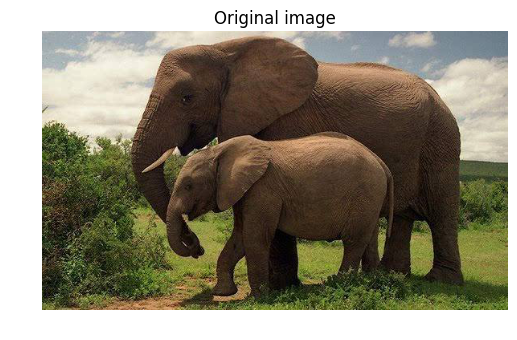

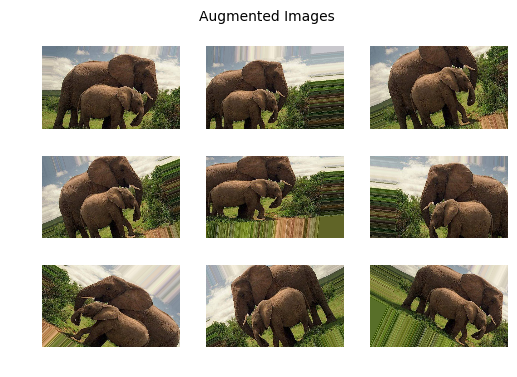

In [2]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = load_img('elephant.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Original image')
plt.show()

x = img_to_array(img) # this is a Numpy array with shape ( 150, 150, 3)
x2 = x.reshape((1,)+x.shape) # this is a Numpy array with shape (1, 150, 150, 3)
# the .flow() command below generates batcher of randomly transformed image
# and saves the results to the "./data/data_augment" directory
i=0
fig =plt.figure()
fig.suptitle('Augmented Images')
for batch in datagen.flow(x2,batch_size=1,
                          save_to_dir='./data/data_augment',save_prefix='elephant',save_format='jpg'):
    i+=1
    if i>9:
        break # otherwise the generator would loop indefinitely
    temp = batch.reshape(x.shape)
    plt.subplot(3,3,i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()